# Overlay Nation Shapefile

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, box, LineString

target_epsg = 6350  # https://epsg.org/crs_6350/NAD83-2011-Conus-Albers.html?sessionkey=nb47agmo4r

Read files

In [2]:
fn_aoi = '/Volumes/Extreme SSD/largest_plots/clean_data/aoi.parquet'
fn_nation_shape = '/Volumes/Extreme SSD/largest_plots/raw_data/cb_2021_us_all_5m/cb_2021_us_nation_5m.zip'
fn_nation_overlay = '/Volumes/Extreme SSD/largest_plots/clean_data/nation_overlay.parquet'

In [3]:
Aoi = gpd.read_parquet(fn_aoi)
NationShape = gpd.read_file(fn_nation_shape).to_crs(epsg=target_epsg)
NationShape.head()

,AFFGEOID,GEOID,NAME,geometry
0,0100000US,US,United States,"MULTIPOLYGON (((-5215608.250 5698763.159, -521..."


Overlay the national boundary on the areas of interest

In [4]:
NationOverlay = gpd.overlay(Aoi, NationShape, how='intersection')[['geometry']]

In [11]:
NationOverlay = NationOverlay.rename(columns={'geometry':'nation_geometry'})
NationOverlay = NationOverlay.set_geometry('nation_geometry').set_crs(epsg=target_epsg)

In [22]:
set(NationOverlay.index.values) == set(Aoi.index.values)

True

# Optional QC

In [24]:
# color_dict = {True:'firebrick', False:'darkorange'}
# is_full_area = np.round(NationOverlay.area) == (100*1e3)*(100*1e3)
# is_full_area = is_full_area.tolist()
# color_list = [color_dict[value] for value in is_full_area]

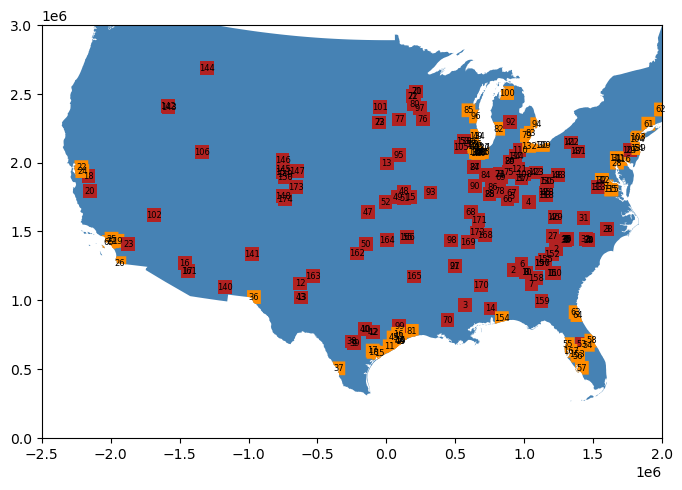

In [25]:
# fig, ax = plt.subplots(figsize=(8, 15))
# xlim = (-0.25*1e7,  0.2*1e7)
# ylim = (0,  3*1e6)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

# NationShape.plot(ax=ax, color='steelblue')
# NationOverlay.plot(ax=ax, color=color_list)

# for x, y, label in zip(Coords.geometry.x, Coords.geometry.y, Coords.index.tolist()):
#     ax.annotate(label, xy=(x, y), fontsize=6, ha='center', va='center')
    
# plt.show()

Here, we can peek at a single overlap, to make sure it worked right.

In [12]:
# indices with overlap
np.where( np.round(NationOverlay.area) != (100*1e3)*(100*1e3) )

(array([  0,   1,  19,  21,  22,  24,  25,  26,  36,  37,  41,  44,  45,
         46,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         79,  81,  82,  83,  85,  94,  96, 100, 103, 104, 109, 111, 112,
        115, 116, 119, 120, 124, 125, 126, 127, 130, 132, 134, 136, 137,
        139, 153, 154, 167, 186, 189, 190, 191, 192, 193, 194, 203, 205,
        206, 207, 210, 211, 214, 215, 218, 219, 224, 226, 227, 229]),)

In [14]:
Coords.shape[0] == NationOverlay.shape[0]

NameError: name 'Coords' is not defined

# Write to disk

In [23]:
NationOverlay.to_parquet(fn_nation_overlay)